В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

<li>groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)</li>
<li>groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных</li>
<li>active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.</li>
<li>checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента.</li>

In [1]:
import numpy as np
import pandas as pd

In [2]:
groups = pd.read_csv('groups.csv',sep = ';')
groups_add = pd.read_csv('group_add.csv',sep = ',')
active_studs = pd.read_csv('active_studs.csv',sep = ';')
checks = pd.read_csv('checks.csv',sep = ';')

In [3]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [4]:
groups.shape

(74484, 2)

In [5]:
# проверим есть ли дубликаты по id
groups['id'].nunique() != groups.shape[0]

False

In [6]:
groups['grp'].value_counts()

B    59813
A    14671
Name: grp, dtype: int64

In [7]:
groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [8]:
groups_add.shape[0]

92

In [9]:
groups_add['id'].nunique() != groups_add.shape[0]

False

In [10]:
groups_add['grp'].value_counts()

B    70
A    22
Name: grp, dtype: int64

In [11]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [12]:
active_studs.shape

(8341, 1)

In [13]:
active_studs['student_id'].nunique() != active_studs.shape[0]

False

In [14]:
active_studs.merge(groups.rename(columns = {'id' : 'student_id'}), how = 'left').\
fillna('not_found').grp.value_counts()

B            6793
A            1535
not_found      13
Name: grp, dtype: int64

In [15]:
#для 13 юзеров нет информации о принадлежности к группе
not_found = active_studs.merge(groups.rename(columns = {'id' : 'student_id'}), how = 'left').\
fillna('not_found').query('grp == "not_found"')

In [16]:
not_found

,student_id,grp
1,5723133,not_found
111,5951797,not_found
632,5730382,not_found
2662,5739944,not_found
3830,5945085,not_found
4900,5700613,not_found
5254,5729371,not_found
5746,5777081,not_found
7413,5740903,not_found
7505,5760471,not_found


In [17]:
groups_add.rename(columns = {'id' : 'student_id'}).query('student_id ==5723133')

,student_id,grp
39,5723133,A


In [18]:
pd.merge(not_found, groups_add.rename(columns = {'id' : 'student_id'}),
         how ='inner',
         on= 'student_id')

,student_id,grp_x,grp_y
0,5723133,not_found,A
1,5951797,not_found,B
2,5730382,not_found,B
3,5739944,not_found,B
4,5945085,not_found,B
5,5700613,not_found,B
6,5729371,not_found,A
7,5777081,not_found,B
8,5740903,not_found,B
9,5760471,not_found,B


In [19]:
# все юзеры чьей информации не было в groups оказались в groups_add, соединим эти 2 датафрейма
groups_all = pd.concat([groups, groups_add]).rename(columns={'id': 'student_id'})
groups_all.grp.value_counts()

B    59883
A    14693
Name: grp, dtype: int64

In [20]:
# дубликатов по id нет
groups_all['student_id'].nunique() != groups_all.shape[0]

False

In [21]:
active_studs.merge(groups_all, how = 'left').fillna('not_found').grp.value_counts()

B    6803
A    1538
Name: grp, dtype: int64

In [22]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [23]:
checks.shape

(541, 2)

In [24]:
checks['rev'].describe()

count     541.000000
mean     1059.752317
std       762.712359
min       199.000000
25%       290.000000
50%       840.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

In [25]:
active_studs = active_studs.merge(groups_all, how = 'left')
active_studs

,student_id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B
...,...,...
8336,1794344,B
8337,296883,B
8338,3598448,B
8339,3610547,B


In [26]:
checks.merge(active_studs, how = 'left', on = 'student_id')

,student_id,rev,grp
0,1627,990.0,A
1,3185,690.0,NaN
2,25973,690.0,NaN
3,26280,690.0,NaN
4,100300,990.0,B
...,...,...,...
536,5645737,1900.0,B
537,5651566,1900.0,B
538,5662322,1900.0,B
539,5681918,1900.0,B


In [27]:
checks.merge(active_studs, how = 'inner', on = 'student_id')

,student_id,rev,grp
0,1627,990.0000,A
1,100300,990.0000,B
2,108270,290.0000,B
3,264473,1900.0001,B
4,274352,690.0000,B
...,...,...,...
387,5645737,1900.0000,B
388,5651566,1900.0000,B
389,5662322,1900.0000,B
390,5681918,1900.0000,B


По условию задания в файле active_studs были айдишники юзеров, кто заходил в приложение в течение эксперемента, но при исследовании данных было замечено, что часть пользователей, совершивших покупку, в приложение не заходила. Предположительно сервис имеет подписочную модель. Пользователей, кто не заходил в приложение не следует включать в анализ эксперемента, так как они попросту не видели изменений.

In [28]:
# сджойним активных пользователей и их траты
df_ab = active_studs.merge(checks, how='left', on='student_id').fillna(0)
df_ab

,student_id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0
...,...,...,...
8336,1794344,B,0.0
8337,296883,B,0.0
8338,3598448,B,0.0
8339,3610547,B,290.0


In [29]:
# добавим столбец конверсии
df_ab['cr'] = df_ab['rev'].apply(lambda x: np.where(x!=0, 1, 0))
df_ab

,student_id,grp,rev,cr
0,581585,A,0.0,0
1,5723133,A,0.0,0
2,3276743,B,0.0,0
3,4238589,A,0.0,0
4,4475369,B,0.0,0
...,...,...,...,...
8336,1794344,B,0.0,0
8337,296883,B,0.0,0
8338,3598448,B,0.0,0
8339,3610547,B,290.0,1


In [30]:
# Количество пользователей совершивших покупку и общее число пользователей по группам
cr = df_ab.groupby('grp').agg({'cr' : 'sum', 'student_id' : 'count'}).\
                rename(columns = {'cr' : 'paiment_users', 'student_id' : 'all_users'})

In [31]:
import seaborn as sns

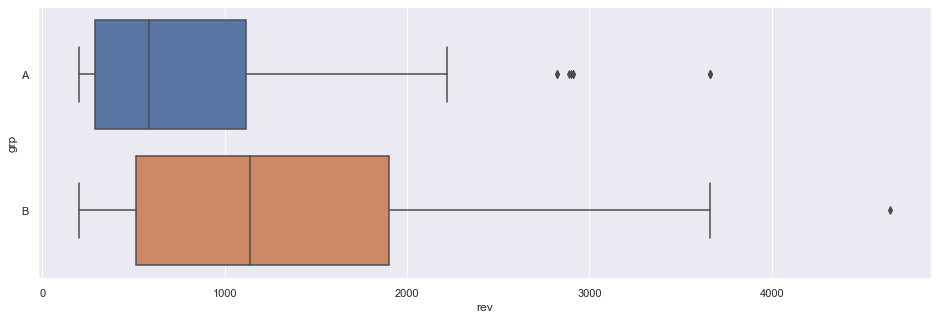

In [32]:
# Распределение трат пользователей по группам
sns.set(rc={'figure.figsize':(16,5)})
sns.boxplot(data=df_ab, x=df_ab.query('rev > 0').rev, y=df_ab['grp'], orient="h");

<AxesSubplot:xlabel='rev', ylabel='Count'>

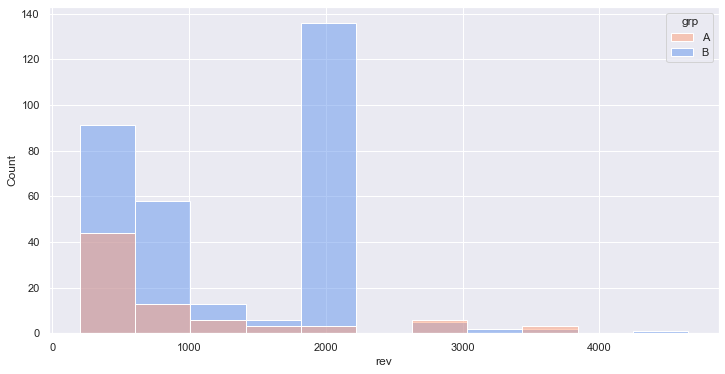

In [33]:
sns.set(rc={'figure.figsize':(12,6)})
colors = ['lightsalmon', 'cornflowerblue']
sns.set_palette(colors)
sns.histplot(data = df_ab.query('rev > 0')[['rev', 'grp']],
             x = 'rev', hue = 'grp')

In [34]:
#Проверим топ5 встречаемых трат юзеров в обеих группах
df_ab.query('rev > 0 & grp == "B"')['rev'].value_counts().head(5)

1900.0000    93
290.0000     45
1900.0001    35
199.0000     27
840.0000     21
Name: rev, dtype: int64

In [35]:
print(len(df_ab.query('rev > 0 & grp == "B"')['rev']))
93 / len(df_ab.query('rev > 0 & grp == "B"')['rev'])

314


0.2961783439490446

In [36]:
df_ab.query('rev > 0 & grp == "A"')['rev'].value_counts().head(5)

290.0    25
580.0     6
990.0     5
590.0     5
199.0     5
Name: rev, dtype: int64

In [37]:
print(len(df_ab.query('rev > 0 & grp == "A"')['rev']))
25 / len(df_ab.query('rev > 0 & grp == "A"')['rev'])

78


0.32051282051282054

Распределение трат также является дополнительным аргументо в пользу версии о подписочной модели приложения
Мода оплаты пользователей в группе B = 1900 рублей, и составляет от всех оплат 30%. В то время как мода группы A = 290 рублей и составляет 25 раз из 78 (32%).

По имеющимся данным просчитаем следующие метрики:
<li>ARPU - средний доход принесенный пользователем
<li>ARPPU - средний доход с платящего пользователя
<li>CR -конверсия в покупку

In [38]:
df_metrics = df_ab.groupby('grp')['rev'].mean().to_frame()

In [39]:
df_metrics

,rev
grp,
A,47.347204
B,58.058798


In [40]:
df_metrics = df_metrics.rename(columns = {'rev' : 'ARPU'})

In [41]:
df_metrics['ARPPU'] = df_ab.query('rev > 0').groupby('grp')['rev'].mean().values

In [42]:
df_metrics['CR'] = df_ab.groupby('grp')['cr'].mean().values

In [43]:
df_metrics = df_metrics.reset_index()
df_metrics

,grp,ARPU,ARPPU,CR
0,A,47.347204,933.589744,0.050715
1,B,58.058798,1257.878992,0.046156


In [44]:
(58.058798/47.347204)-1

0.22623498528022923

In [45]:
1-(0.046156/0.050715)

0.08989450852804892

Средний чек в тестовой группе отличается от контроля на 23%.
А конверсия в тестовой группе на 9% ниже контрольной
Проверим является ли эти различия статистически значимыми

<h2><b>ARPU = CR * ARPPU</b></h2>

В ходе тестирования будем проверять изменчивость метрик CR и ARPPU, как метрик-компонент ARPU.

удем проверять две гипотезы:

<p>Н0: ARPPU_A = ARPPU_B. H1: ARPPU(A) < ARPPU(B).</p>
<p>Н0: CR_A = CR_B. H1: CR(A) > CR(B).</p>
Уровень значимости α = 0.05

<p>ARPPU - среднее, оценим возможность применения t-test.</p>
CR - категориальная переменная, будем использовать критерий хи-квадрат.

Так как пользователей совершивших покупку относительно мало -  проверим распределения средних двух групп на нормальность. 
Для проверки гипотезы о нормальности распределений средних воспользуемся тестом Шапиро-Уилка с α = 0.05
Перед этим засимулируем 10000 выборок с возвращениями.

In [46]:
ARPPU_a = df_ab.query('grp == "A" & rev > 0')['rev']
ARPPU_b = df_ab.query('grp == "B" & rev > 0')['rev']

In [47]:
ARPPU_mean_a = []
ARPPU_mean_b = []

for _ in range(10000):
    ARPPU_mean_a.append(ARPPU_a.sample(n = len(ARPPU_a),
                                      replace = True).mean())
    ARPPU_mean_b.append(ARPPU_b.sample(n = len(ARPPU_b),
                                      replace = True).mean())


In [48]:
a = pd.DataFrame(data = ARPPU_mean_a, columns = ['mean'])
a['grp'] = 'a'
b = pd.DataFrame(data = ARPPU_mean_b, columns = ['mean'])
b['grp'] = 'b'
AB_means = pd.concat([a, b]).reset_index()
AB_means

,index,mean,grp
0,0,893.820513,a
1,1,893.884615,a
2,2,840.205128,a
3,3,934.961538,a
4,4,810.230769,a
...,...,...,...
19995,9995,1240.710202,b
19996,9996,1279.681541,b
19997,9997,1227.719757,b
19998,9998,1248.649694,b


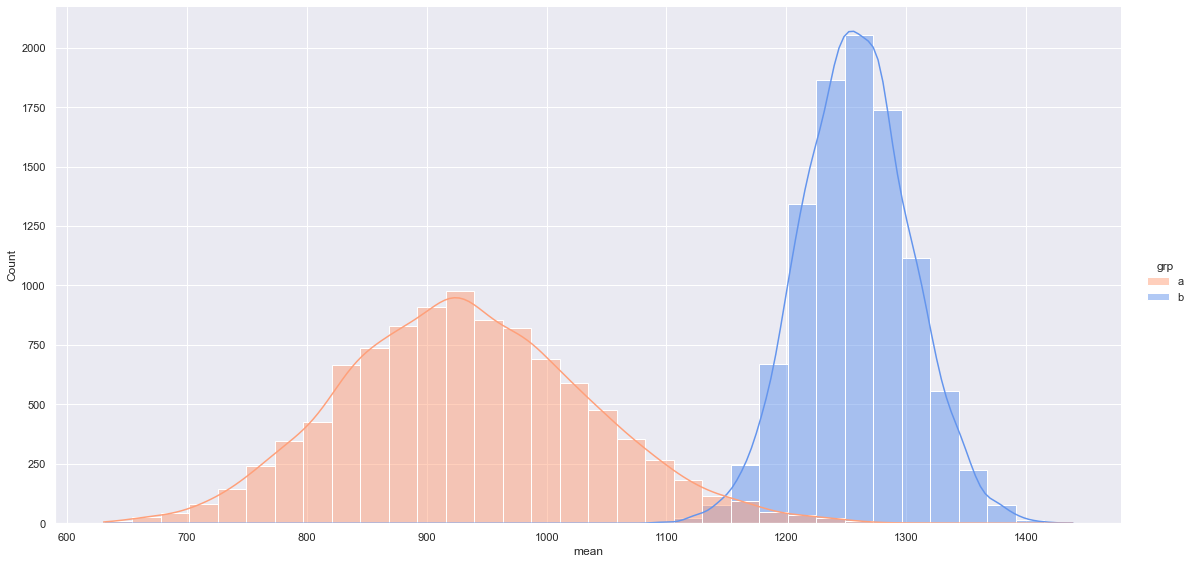

In [49]:
sns.displot(data=AB_means, x='mean', hue='grp', height=8, aspect=2, kde = True);

In [50]:
from scipy.stats import  chi2_contingency, shapiro

In [51]:
shapiro(ARPPU_mean_a)

C:\Users\Админ\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9976600408554077, pvalue=2.4622503688731534e-11)

In [52]:
shapiro(ARPPU_mean_b)

ShapiroResult(statistic=0.9997385144233704, pvalue=0.23996958136558533)

Среднее в группе А распределено не нормально (p-value < α). Это следтсвие присутствия в выборке пользователей, которые потратили значительно больше, чем остальные, а так же малым размером выборки. Таких пользователей "выбросами" считать нельзя, поэтому не будем их удалять из выборки. При этом распредление средних ARPPU в группе В нормальное. В связи с тем, что не удволетворяется критерии нормальности для применения t-test, для проверки гипотезы о равенстве ARPPU будем использовать bootstrap.

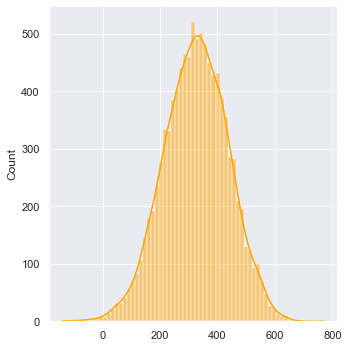

In [53]:
# возьмем 10000 подвыборок для разности средних
AB_mean_delta = []

for i in range(10000):
    
    AB_mean_delta.append(ARPPU_b.sample(len(ARPPU_b), replace=True).mean() \
                         - ARPPU_a.sample(len(ARPPU_a), replace=True).mean())

sns.displot(AB_mean_delta, color = 'orange', kde = True);

In [54]:
# Построим доверительный интервал для разности средних
np.quantile(AB_mean_delta,[0.025, 0.975])

array([103.97349436, 540.24043567])

Вывод: Так как 0 не попадает в границы доверительного интервала, то нулевая гипотеза о равенстве ARPPU в группах А и В отклоняется и принимается альтернативная ARPPU(A) < ARPPU(B).

In [55]:
df_ab

,student_id,grp,rev,cr
0,581585,A,0.0,0
1,5723133,A,0.0,0
2,3276743,B,0.0,0
3,4238589,A,0.0,0
4,4475369,B,0.0,0
...,...,...,...,...
8336,1794344,B,0.0,0
8337,296883,B,0.0,0
8338,3598448,B,0.0,0
8339,3610547,B,290.0,1


In [56]:
chi2_contingency(cr)

(0.43612258061018483,
 0.5089998823014525,
 1,
 array([[  72.53773045, 1543.46226955],
        [ 319.46226955, 6797.53773045]]))

Вывод: Так как p-value >  0.05, нулевая гипотеза о равенстве конверсий CR_A = CR_B не отвергается.
И утверждать, что новая механика ухудшает конверсию нельзя.

Итоговый вывод: По результатам A/B теста новая механика оплаты увеличила ARPPU и как следствие ARPU, CR без изменений. 